***<u>Simple Linear Regression</u>***

In [77]:
***Steps***
# Step 1: Import necessary libraries
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
# Step 3: Creating a Linear Regression Model
# Step 4: Training the model using data set
# Step 5: Get the values of slope and intercept from the trained model
# Step 6: Display the equation of the line
# Step 7: Predit values using the model
# Step 8: Plot the regression line
# Step 9: Prediction Features

In [168]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS Regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
 

In [170]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [172]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [174]:
# Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [176]:
# Step 3: Create a Linear Regression Model
model = LinearRegression() #Initialize the model

In [178]:
# Step 4: Train  the model using the dataset
model.fit(X,Y) #The model learns the best-fit line by minimizing the error

LinearRegression()

In [180]:
# Step 5: Get the values of slope (m) and intercept (c) from the trained model
m = model.coef_[0] #Coefficient (slope) of the regression line
c = model.intercept_ #Intercept (where the line crosses the Y-axis) 
print("Slope:",m)
print("Intercept:",c)

Slope: 4.965498141580591
Intercept: 27.430065779800536


In [182]:
# Step 6: Display the equation of the line
print(f"Equation of the Line: y = {m:.2f}x + {c:.2f}")

Equation of the Line: y = 4.97x + 27.43


In [184]:
# Step 7: predict values using the model
Y_pred = model.predict(X) #predict salaries for the given experience values

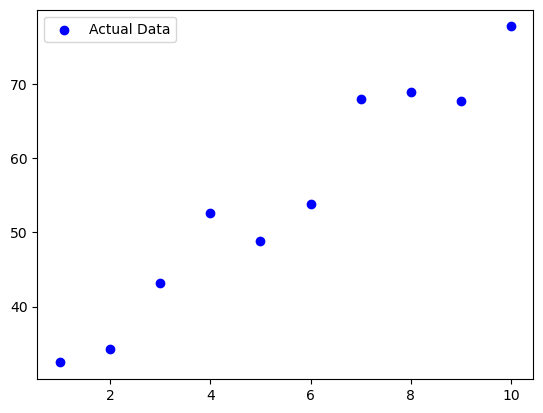

In [186]:
# Step 8: Plot the actual data points
plt.scatter(X, Y, color='blue', label='Actual Data') #Scalar plot of actual values
plt.legend()

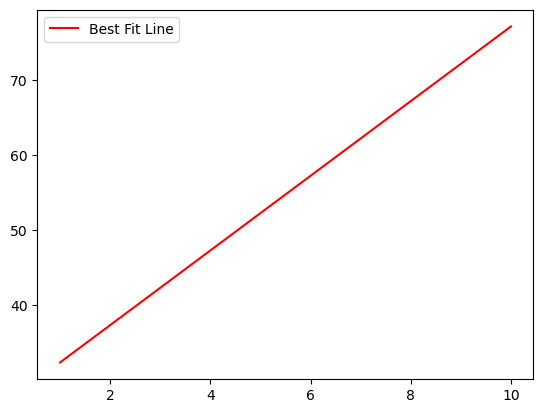

In [188]:
# Step 9: Plot the Regression line (best fit line)
plt.plot(X, Y_pred, color='red', label='Best Fit Line') #Regression line
plt.legend()

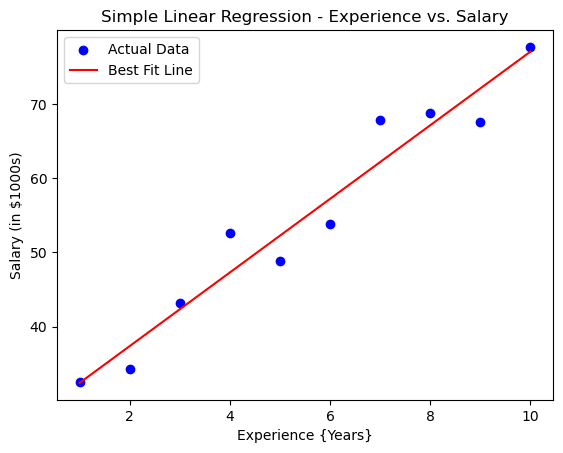

In [190]:
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Best Fit Line')

# Step 10: Add labels and legend
plt.xlabel('Experience {Years}') 
plt.ylabel('Salary (in $1000s)')
plt.title('Simple Linear Regression - Experience vs. Salary')
plt.legend()

# Step 11: Display the graph
plt.show()

In [192]:
#  Step 12: Prediction of the features
#User can input experience, and the model will predict salary
while True:
    try:
        exp = float(input("\nEnter years of experience to predict salary (or -1 to exit):"))
        if exp <= -1:
            break
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid number")


Enter years of experience to predict salary (or -1 to exit): 5


Predicted salary for 5.0 years of experience: $52.26K



Enter years of experience to predict salary (or -1 to exit): -1


***<u>Model Evaluation Metrics</u>***

***1: mean squared error (MSE) - measures avg squared diff btw actual and predicted values***

In [194]:
mse = mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 11.75


***2: mean absolute error (MAE) - measures avg absolute diff between actual and predicted values***

In [196]:
mae = mean_absolute_error(Y, Y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2.87


***3: root mean squared error (RMSE) - measures std deviation of residuals***

In [198]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 3.43


***4: R-squared (R²) - represents how well the model fits the data (0 to 1, where 1 is best)***

In [200]:
r2 = r2_score(Y, Y_pred)
print(f"R-squared (R²): {r2:.2f}")

R-squared (R²): 0.95


***5: adjusted r-squared (R²_adj) - adjusted for the number of predictors, better for multiple regression***

In [202]:
n=len(Y) #Number of observations
p=1 #Number of independent variables (Experience)
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f'Adjusted R-squared: {adj_r2:.2f}')

Adjusted R-squared: 0.94


***6: OLS (Ordinary Least Squares) Regression - Gives detailed statistical summary of the regression***

In [204]:
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:09:34   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\Proxy1\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
